In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#open data set
wine = pd.read_csv("C:\Adam\Coding\SciPy\WineQT.csv")

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
wine.info()
wine.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 102.8 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
wine["quality"]

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [6]:
bins = (2,6.5,8)
group_names = ["bad","good"]
wine["quality"] = pd.cut(wine["quality"], bins = bins, labels = group_names)
wine["quality"].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [7]:
wine["quality"]

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1138    bad
1139    bad
1140    bad
1141    bad
1142    bad
Name: quality, Length: 1143, dtype: category
Categories (2, object): ['bad' < 'good']

In [8]:
label_quality = LabelEncoder()

In [9]:
wine["quality"] = label_quality.fit_transform(wine["quality"])

In [10]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,0


In [11]:
wine["quality"].value_counts()

0    984
1    159
Name: quality, dtype: int64

C:\Adam\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

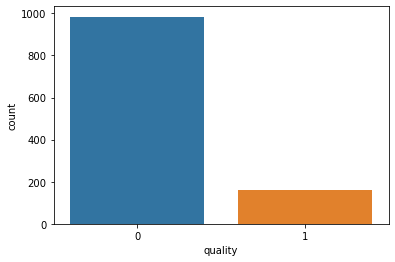

In [12]:
sns.countplot(wine["quality"])

In [13]:
# seperate data set
X = wine.drop("quality",axis=1) # all data
y = wine["quality"] # just quality column

In [14]:
# train and split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42 )

In [15]:
# Scale the data
sc = StandardScaler()

In [16]:
# data is transformed and scaled to data of similar size for each column
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Random Forest Classifier

In [17]:
rfc = RandomForestClassifier(n_estimators=200) # how many trees in the forest
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

In [18]:
# get data
print(classification_report(pred_rfc,y_test))
print(confusion_matrix(pred_rfc,y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       206
           1       0.61      0.74      0.67        23

    accuracy                           0.93       229
   macro avg       0.79      0.84      0.81       229
weighted avg       0.93      0.93      0.93       229

[[195  11]
 [  6  17]]


# SVM Classifier

In [19]:
clf = svm.SVC()
clf.fit(X_train,y_train)
pred_clf = clf.predict(X_test)

In [20]:
print(classification_report(pred_clf,y_test))
print(confusion_matrix(pred_clf,y_test))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       216
           1       0.29      0.62      0.39        13

    accuracy                           0.89       229
   macro avg       0.63      0.76      0.67       229
weighted avg       0.94      0.89      0.91       229

[[196  20]
 [  5   8]]


# Neural Network

In [21]:
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train,y_train)
pred_mlpc = mlpc.predict(X_test)

C:\Adam\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
print(classification_report(pred_mlpc,y_test))
print(confusion_matrix(pred_mlpc,y_test))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       195
           1       0.64      0.53      0.58        34

    accuracy                           0.89       229
   macro avg       0.78      0.74      0.76       229
weighted avg       0.88      0.89      0.88       229

[[185  10]
 [ 16  18]]


# Showing Accuracy

In [23]:
from sklearn.metrics import accuracy_score
rfAccuracy = accuracy_score(y_test,pred_rfc)


In [24]:
rfAccuracy

0.925764192139738

In [25]:
Xnew = [[6.3,0.65,0.0,1.2,0.065,15.0,11.0,0.9946,3.39,0.47,10.0]]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew

array([1])

#### Footer
Followed a tutorial from https://www.youtube.com/watch?v=TtIjAiSojFE
Data set used https://www.kaggle.com/yasserh/wine-quality-dataset minus index column